In [6]:
#################  Exercice 1 ###############
from keras.datasets import mnist
from sklearn.manifold import TSNE
from scipy.spatial import ConvexHull
from sklearn.mixture import GaussianMixture
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as linalg
import matplotlib as mpl

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

X_embedded = TSNE(n_components=2,verbose=2,init='pca').fit_transform(X_train[0:1000,:])

In [2]:
#################  Exercice 2 ###############
def convexHulls(points, labels):
# computing convex hulls for a set of points with asscoiated labels
    convex_hulls = []
    for i in range(10):
        convex_hulls.append(ConvexHull(points[labels==i,:]))
    return convex_hulls
# Function Call
convex_hulls= convexHulls(X_embedded, y_train[0:1000])

def best_ellipses(points, labels):
# computing best fiiting ellipse for a set of points with asscoiated labels
    gaussians = []
    for i in range(10):
        gaussians.append(GaussianMixture(n_components=1, covariance_type='full').fit(points[labels==i, :]))
    return gaussians
# Function Call
ellipses = best_ellipses(X_embedded,y_train[0:1000])

In [3]:
from sklearn.neighbors import NearestNeighbors
def neighboring_hit(points, labels):
    k = 6
    nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='ball_tree').fit(points)
    distances, indices = nbrs.kneighbors(points)

    txs = 0.0
    txsc = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    nppts = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    for i in range(len(points)):
        tx = 0.0
        for j in range(1,k+1):
            if (labels[indices[i,j]]== labels[i]):
                tx += 1
        tx /= k
        txsc[labels[i]] += tx
        nppts[labels[i]] += 1
        txs += tx
    for i in range(10):
        txsc[i] /= nppts[i]
    print(txsc)

    return txs / len(points)
#go=neighboring_hit(X_embedded, y_train[0:1000])

def visualization(points2D, labels, convex_hulls, ellipses ,projname, nh):
    points2D_c= []
    for i in range(10):
        points2D_c.append(points2D[labels==i, :])
  # Data Visualization
    cmap =cm.Vega10
    plt.figure(figsize=(3.841, 7.195), dpi=100)
    plt.set_cmap(cmap)
    plt.subplots_adjust(hspace=0.4 )
    plt.subplot(311)
    plt.scatter(points2D[:,0], points2D[:,1], c=labels,  s=3,edgecolors='none', cmap=cmap, alpha=1.0)
    plt.colorbar(ticks=range(10))
    plt.title("2D "+projname+" - NH="+str(nh*100.0))
    vals = [ i/10.0 for i in range(10)]
    sp2 = plt.subplot(312)
    for i in range(10):
        ch = np.append(convex_hulls[i].vertices,convex_hulls[i].vertices[0])
        sp2.plot(points2D_c[i][ch, 0], points2D_c[i][ch, 1], '-',label='$%i$'%i, color=cmap(vals[i]))
    plt.colorbar(ticks=range(10))
    plt.title(projname+" Convex Hulls")
 
    def plot_results(X, Y_, means, covariances, index, title, color):
        splot = plt.subplot(3, 1, 3)
        for i, (mean, covar) in enumerate(zip(means, covariances)):
            v, w = linalg.eigh(covar)
            v = 2. * np.sqrt(2.) * np.sqrt(v)
            u = w[0] / linalg.norm(w[0])
              # as the DP will not use every component it has access to
              # unless it needs it, we shouldn't plot the redundant
              # components.
            if not np.any(Y_ == i):
                  continue
            plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color, alpha = 0.2)

              # Plot an ellipse to show the Gaussian component
            angle = np.arctan(u[1] / u[0])
            angle = 180. * angle / np.pi  # convert to degrees
            ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
            ell.set_clip_box(splot.bbox)
            ell.set_alpha(0.6)
            splot.add_artist(ell)
        plt.title(title)
    plt.subplot(313)
    for i in range(10):
        plot_results(points2D[labels==i, :], ellipses[i].predict(points2D[labels==i, :]), ellipses[i].means_,
        ellipses[i].covariances_, 0,projname+" fitting ellipses", cmap(vals[i]))

    plt.savefig(projname+".png", dpi=100)
    plt.show()                  
#visualization(X_embedded, y_train[0:1000], convex_hulls, ellipses ,'t-sne', go)

[0.5687074829931967, 0.8791483113069022, 0.24790051679586475, 0.38894389438943927, 0.3223014256619146, 0.18497757847533625, 0.2797494780793318, 0.3612191958495465, 0.2303216974674875, 0.29715890320449284]


C:\Users\HMD\Anaconda3\envs\deeplearning\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The Vega10 colormap was deprecated in version 2.0. Use tab10 instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\HMD\Anaconda3\envs\deeplearning\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


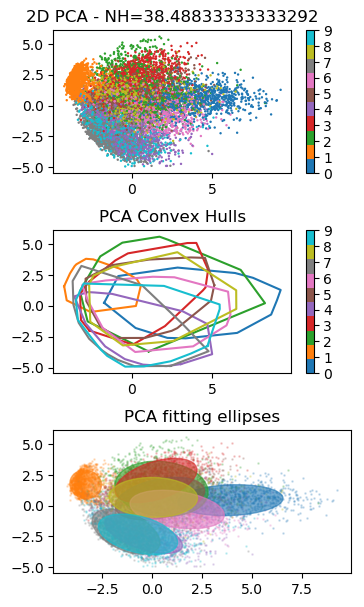

In [4]:
############## using pca  ##############
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#X_test, y_test

pca = PCA(n_components=2)
X=X_test;
X_r = pca.fit(X).transform(X)
#X_r = pca.fit_transform(X)
convex_hulls= convexHulls(X_r, y_test)
ellipses = best_ellipses(X_r,y_test)
go1=neighboring_hit(X_r, y_test)
visualization(X_r, y_test, convex_hulls, ellipses ,'PCA', go1)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.781s...
[t-SNE] Computed neighbors for 10000 samples in 148.771s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.030838
[t-SNE] Computed conditional probabilities in 0.375s
[t-SNE] Iteration 50: error = 84.6610489, gradient norm = 0.0044793 (50 iterations in 16.881s)
[t-SNE]

C:\Users\HMD\Anaconda3\envs\deeplearning\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The Vega10 colormap was deprecated in version 2.0. Use tab10 instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\HMD\Anaconda3\envs\deeplearning\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


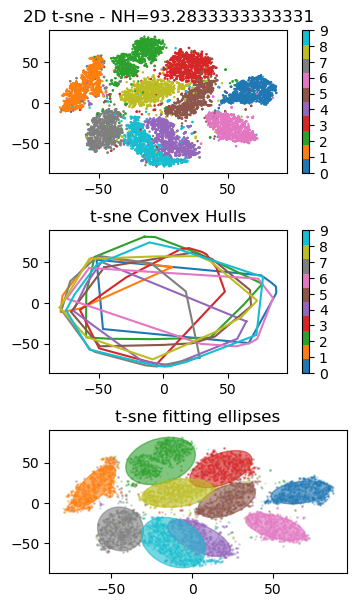

In [5]:
############## using tsne ############## 
X_embedded = TSNE(n_components=2,verbose=2,init='pca').fit_transform(X_test)#X_test, y_test
convex_hulls= convexHulls(X_embedded, y_test)
ellipses = best_ellipses(X_embedded,y_test)
go=neighboring_hit(X_embedded, y_test)
visualization(X_embedded, y_test, convex_hulls, ellipses ,'t-sne', go)

In [7]:
#################  Exercice 3 ###############
from keras.models import model_from_yaml
def loadModel(savename):
    with open(savename+".yaml", "r") as yaml_file:
        model = model_from_yaml(yaml_file.read())
    print("Yaml Model ",savename,".yaml loaded ")
    model.load_weights(savename+".h5")
    print("Weights ",savename,".h5 loaded ")
    return model

model=loadModel("Perceptron")
model.summary()

Yaml Model  Perceptron .yaml loaded 
Weights  Perceptron .h5 loaded 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 100)               78500     
_________________________________________________________________
activation_7 (Activation)    (None, 100)               0         
_________________________________________________________________
fc2 (Dense)                  (None, 10)                1010      
_________________________________________________________________
activation_8 (Activation)    (None, 10)                0         
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [6]:
from keras.optimizers import SGD
import keras.utils as np_utils
X_test = X_test.reshape(10000, 784)
X_test = X_test.astype('float32')
X_test /= 255
Y_test = np_utils.to_categorical(y_test, 10)

learning_rate = 0.5
sgd = SGD(learning_rate)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

scores = model.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

loss: 387.18%
acc: 8.92%


In [ ]:
model.pop()
#model.pop()
X=model.predict(X_test)

In [ ]:
convex_hulls= convexHulls(X, y_test)
ellipses = best_ellipses(X,y_test)
go=neighboring_hit(X, y_test)
visualization(X, y_test, convex_hulls, ellipses ,'MLP', go)